# <p style= 'background-color:crimson;font-size:150%;text-align:center;border-radius:5px'>Stock Market Analysis</p>


## Data

<p>In this Project, i will analyse data of some Brazillian stocks in different market segments. The data will be extracted using <b>pandas datareader</b>. <br>We will get information for the following stocks:<br></p>
<ul>
    <li><b>PETROBRAS(PETR4.SA):</b> Energy segment focusing on exploring, refining and generating petroleum an its derivatives.</li>
    <li><b>Vale S.A(VALE3.SA):</b> In raw material segment, Vale is one of the biggest mining company of the world.</li>
    <li><b>Magazine Luiza(MGLU3.SA):</b> Big company inside retail segment.</li>
    <li><b>AMBEV(ABEV3.SA):</b> In the consumption segment, it's the biggest ale manifacturer company of the world .</li>
</ul>


# <p style = 'background-color:purple;border-radius:5px; text-align:center'>Contents</p>
* [1. What's the change in stock's price over time?](#1)
* [2. How a moving average will behave on these charts?](#2)
    * [2.1. Plotting Moving Averages in all stocks for better analysis](#2.1)
* [3. Why volume is important?](#3)
* [4. What was the daily return average of a stock?](#4)
    * [4.1. Checking Correlations between stocks returns](#4.1)

In [91]:
#Data manipulation
import pandas as pd
import numpy as np
import time

#Visual Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline
sns.set_style('whitegrid')

#financial analysis
import pandas_datareader as web
from datetime import datetime

In [92]:
#data from 2 years back
end = datetime(2022, 1, 1)
start = datetime(2020, 1, 1)

In [93]:
#tracks the load time
start_timer = time.time()
#getting stock data
petr = web.DataReader('PETR4.SA', 'yahoo', start, end)
vale = web.DataReader('VALE3.SA', 'yahoo', start, end)
mglu = web.DataReader('MGLU3.SA', 'yahoo', start, end)
abev = web.DataReader('ABEV3.SA', 'yahoo', start, end)
end_timer = time.time() - start_timer

print(f'Done! Took {round(end_timer, 2)} seconds to load all data.')

Done! Took 5.06 seconds to load all data.


---
<a id = 1></a>
# <p style = 'background:crimson;border-radius:5px;text-align:center'>What's the change in stock's price over time?</p>


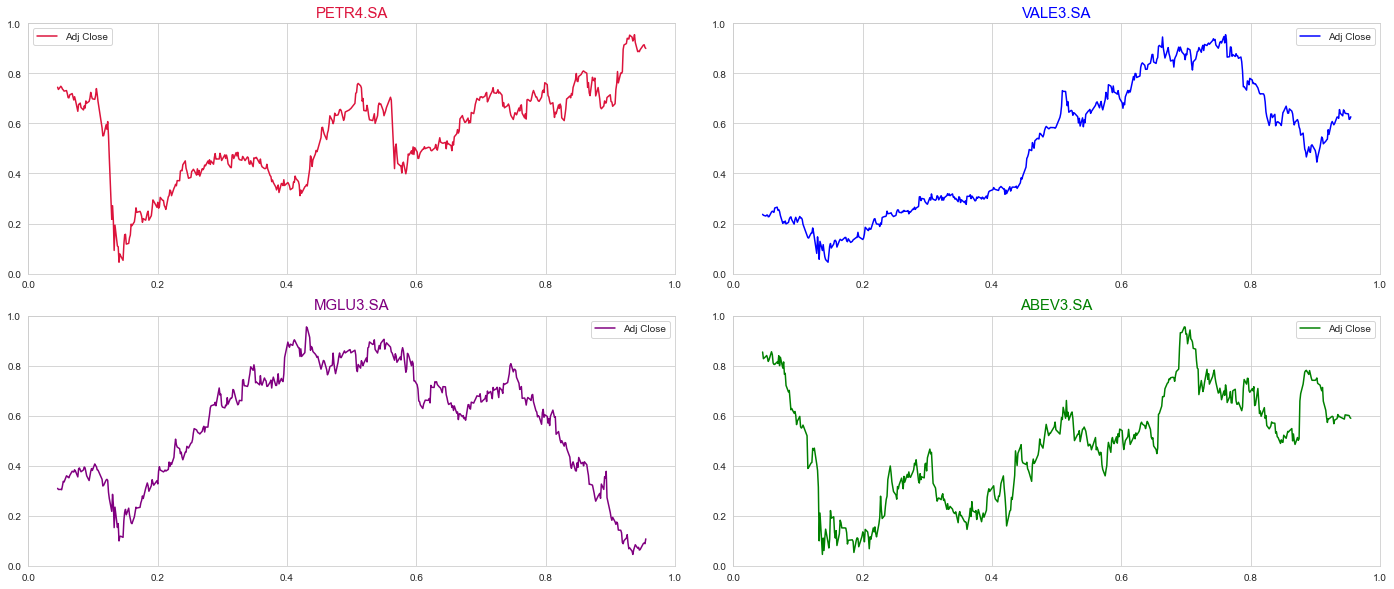

In [94]:
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize = (20,10))
fig.tight_layout(pad = 3.0)
fig.add_subplot(221)
petr['Adj Close'].plot(color = 'crimson', legend = True)
plt.title('PETR4.SA', fontsize = '15', color = 'crimson')
plt.axis('off')

fig.add_subplot(222)
vale['Adj Close'].plot(color = 'blue',legend = True)
plt.title('VALE3.SA', fontsize = '15', color = 'blue')
plt.axis('off')

fig.add_subplot(223)
mglu['Adj Close'].plot(color = 'purple', legend = True)
plt.title('MGLU3.SA', fontsize = '15', color = 'purple')
plt.axis('off')

fig.add_subplot(224)
abev['Adj Close'].plot(color = 'green', legend = True)
plt.title('ABEV3.SA', fontsize = '15', color = 'green')
plt.axis('off')

plt.show()   

In [95]:
vale.describe().T

,count,mean,std,min,25%,50%,75%,max
High,495.0,7.743830e+01,2.359869e+01,3.586000e+01,5.696500e+01,7.468000e+01,9.870500e+01,1.204500e+02
Low,495.0,7.531170e+01,2.324986e+01,3.245000e+01,5.576500e+01,7.115000e+01,9.595000e+01,1.152500e+02
Open,495.0,7.642760e+01,2.344576e+01,3.555000e+01,5.645500e+01,7.302000e+01,9.729000e+01,1.198000e+02
Close,495.0,7.636729e+01,2.343472e+01,3.410000e+01,5.633500e+01,7.370000e+01,9.745500e+01,1.187200e+02
Volume,495.0,2.879879e+07,1.364656e+07,7.831800e+06,2.054455e+07,2.594750e+07,3.290755e+07,1.825358e+08
Adj Close,495.0,6.147149e+01,2.064951e+01,2.547351e+01,4.208358e+01,6.380104e+01,7.878419e+01,9.728542e+01


<a id = 2></a>
# <p style = 'background:crimson;border-radius:5px;text-align:center'>How a moving average will behave on these charts?</p>
- Let's find out by plotting a slow(100 periods), medium(50 periods) and a quick(9 periods) moving average to see the difference.

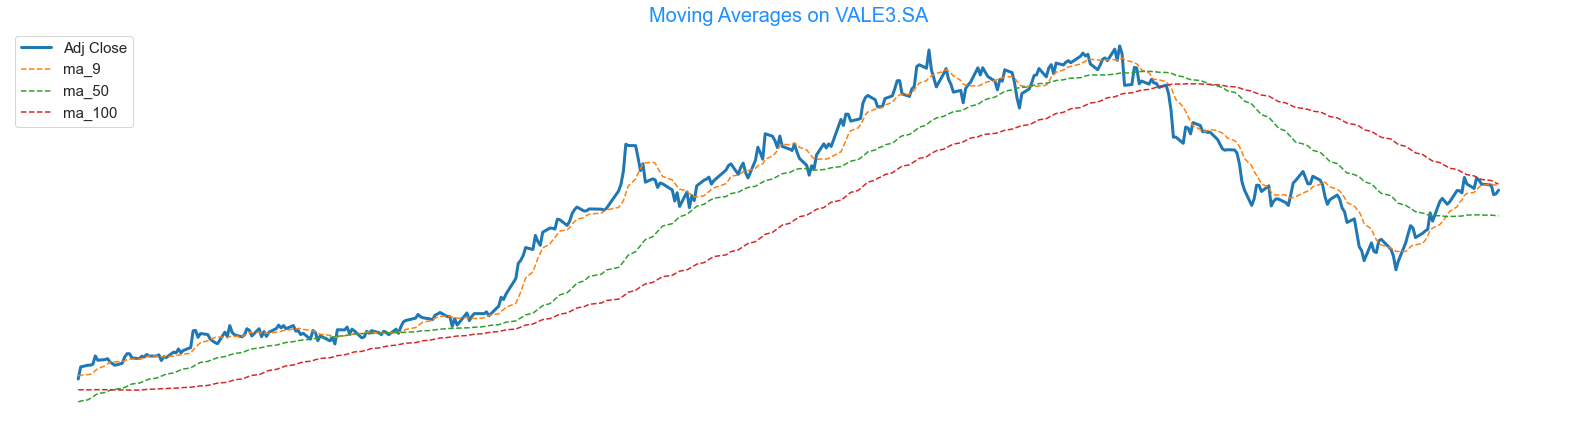

In [96]:
#creating moving averages
stock_list = [petr, vale, mglu, abev]
for stock in stock_list:
    stock['ma_9'] = stock['Adj Close'].rolling(window = 9, center = False).mean()
    stock['ma_50'] = stock['Adj Close'].rolling(window = 50, center = False).mean()
    stock['ma_100'] = stock['Adj Close'].rolling(window = 100, center = False).mean()


#plottting
#slicing the data to fit the average better
#price
vale.iloc[100:]['Adj Close'].plot(figsize = (28, 8), linewidth = 3)

#averages
vale.iloc[100:]['ma_9'].plot(figsize = (28, 8), linestyle = 'dashed')
vale.iloc[100:]['ma_50'].plot(figsize = (28, 8), linestyle = 'dashed')
vale.iloc[100:]['ma_100'].plot(figsize = (28, 8), linestyle = 'dashed')
plt.title('Moving Averages on VALE3.SA', fontsize = 20, color = 'dodgerblue')
plt.legend(loc = 'upper left', fontsize = 15)
plt.axis('off')
plt.show()


---
<a id = 2.1></a>
## Plotting Moving Averages in all stocks for better analysis 

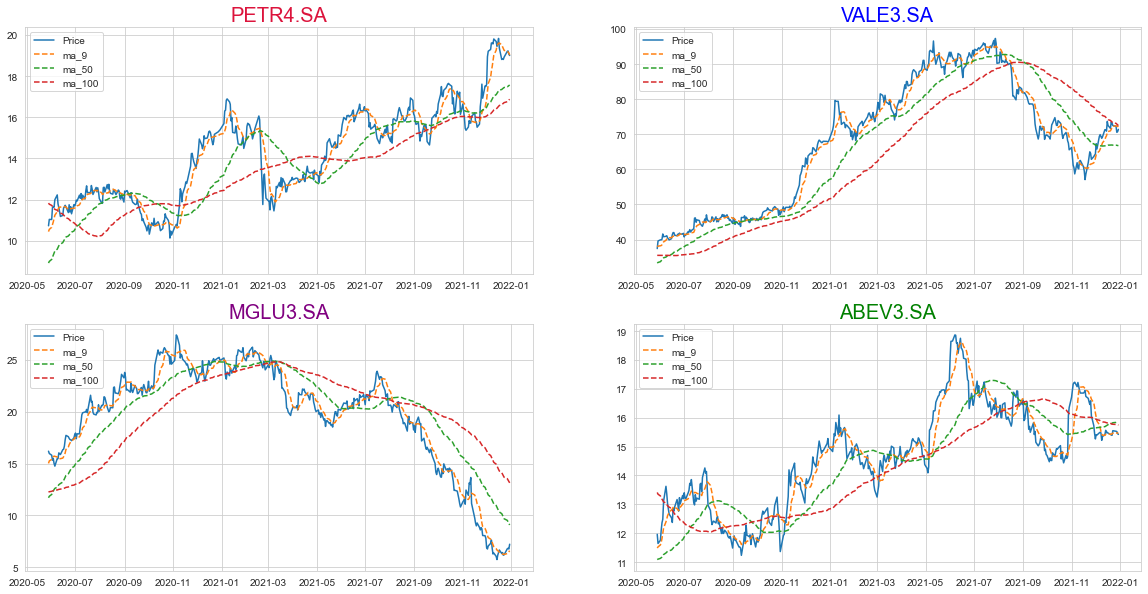

In [97]:
#adding moving averages to all stocks
stock_list = [petr, vale, mglu, abev]
for stock in stock_list:
    stock['ma_9'] = stock['Adj Close'].rolling(window = 9, center = False).mean()
    stock['ma_50'] = stock['Adj Close'].rolling(window = 50, center = False).mean()
    stock['ma_100'] = stock['Adj Close'].rolling(window = 100, center = False).mean()
mglu.head()


rows = 2
cols = 2
fig = plt.figure(figsize = (20, 10))
fig.tight_layout(pad = - 1.0)

#plotting all stocks
stock_names = [('PETR4.SA', 'crimson'), ('VALE3.SA', 'blue'), ('MGLU3.SA', 'purple'), ('ABEV3.SA', 'green')]
for i in range(1, 5):
    ax = fig.add_subplot(2,2,i)
    #ax.plot(stock_list[i - 1].iloc[100:][['Adj Close', 'ma_9', 'ma_50', 'ma_100']])
    ax.plot(stock_list[i-1].iloc[100:]['Adj Close'], linewidth = 1.5, label = 'Price')
    ax.legend(loc="upper left")
    plt.title(stock_names[i - 1][0], color = stock_names[i - 1][1], fontsize = 20)
    
    #moving averages
    ax.plot(stock_list[i-1].iloc[100:][['ma_9']], label = 'ma_9', linestyle = 'dashed')
    ax.legend(loc = 'upper left')
    
    ax.plot(stock_list[i-1].iloc[100:][['ma_50']], label = 'ma_50', linestyle = 'dashed')
    ax.legend(loc = 'upper left')
    
    ax.plot(stock_list[i-1].iloc[100:][['ma_100']], label = 'ma_100', linestyle = 'dashed')
    ax.legend(loc = 'upper left')
    

Plotting different moving averages allow us to take better reading of the price

<ul style = 'border: 1px dashed gray; border-radius: 5px'>
    <li>The quick moving average(ma_9) tracks a faster trend and moves closer to the price. A quicker trend is more likely to be volatile, with quick periods of up and down trends.
    </li>
    <li>The moving average of 50 periods changes directions slower being more steady. It is used to track longer trends.     </li>
    <li>The slow moving average(ma_100) is used to check the overall trend. Staying further from the price and having low volatility, we can say if the price is under this average we get a strong bearish trend and a strong bullish if it is above.
    </li>
</ul>

<a id = 3></a>
# <p style = 'background:crimson;border-radius:5px;text-align:center'>Why volume is important?</p>

<ul style = 'border:1px dashed gray; border-radius:5px'>
    <li>Volume measures the number of shares traded in a stock or contracts traded in futures or options.</li>
    <li>Can indicate market strength, as rising markets on increasing volume are typically viewed as strong and healthy.     </li>
    <li>When prices fall on increasing volume, the trend is gathering strength to the downside.</li>
    <li>When prices reach new highs(or lows) with decreasing volume, watch out, a reversal might happen soon</li>
</ul>

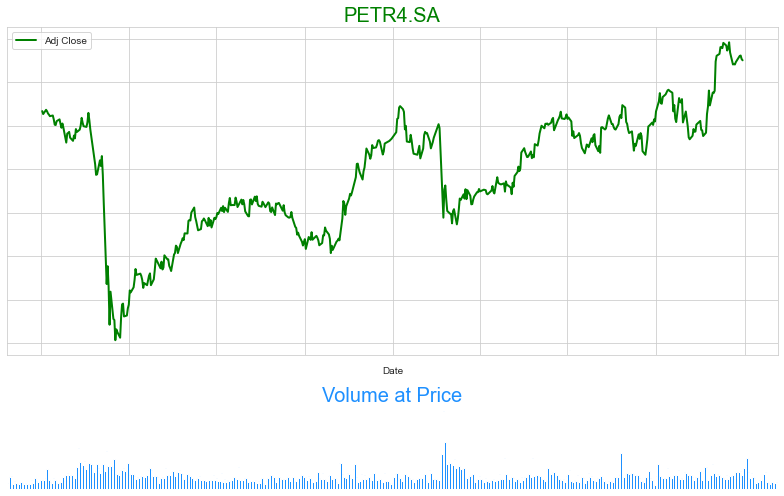

In [98]:
# plot it
fig = plt.figure(figsize=(11,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1]) 

#stock price
ax0 = plt.subplot(gs[0])
ax0.set_yticklabels([])
ax0.set_xticklabels([])
petr['Adj Close'].plot(legend = True, linewidth=2, color = 'green')
plt.title('PETR4.SA', fontsize = 20, color = 'green')

#volume
ax1 = plt.subplot(gs[1])
plt.axis('off')
petr['Volume'].plot.bar(x = vale.index.day, rot = 0, color = 'dodgerblue', stacked = False, width=1)
plt.title('Volume at Price', fontsize = 20, color= 'dodgerblue')
plt.tight_layout()

---
<a id = 4></a>
# <p style = 'background:crimson; border-radius:5px;text-align:center'>What was the daily return average of a stock.</p>

In [99]:
#The daily return column can be created by using the percentage change over the adjusted closing price
vale['Daily Return'] = vale['Adj Close'].pct_change()

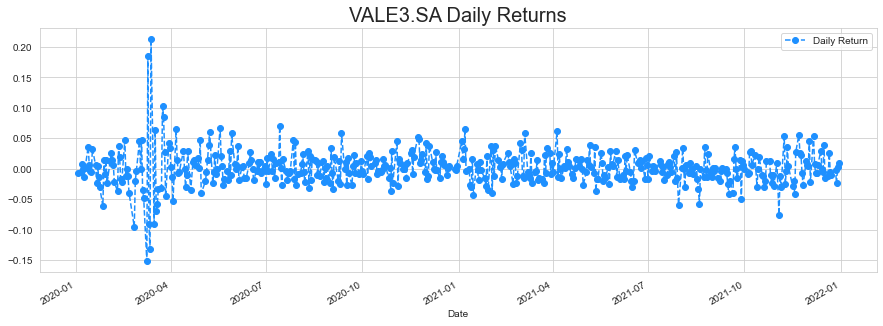

In [100]:
vale['Daily Return'].plot(figsize =(15, 5), legend=True, linestyle = '--', marker = 'o', color = 'dodgerblue')
plt.title('VALE3.SA Daily Returns', fontsize = 20)
plt.show()

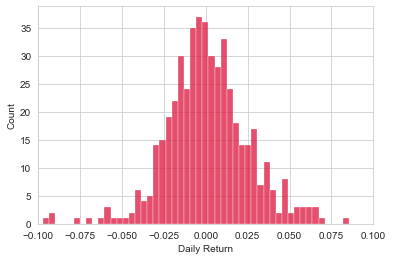

In [101]:
sns.histplot(x=vale['Daily Return'].dropna(),bins=100,color='crimson')
plt.xlim(-0.10, 0.10)
plt.show()

<span style = 'font-size:110%'>Positive daily returns seem to be more frequent for Vale.</span>

---
<a id = 4.1></a>
## Checking Correlations between stocks returns

In [102]:
#Reading just the 'Adj Close' column from stocks this time
stock_list = ['PETR4.SA', 'VALE3.SA', 'MGLU3.SA', 'ABEV3.SA']
close_df = web.DataReader(stock_list,'yahoo',start,end)['Adj Close']

In [103]:
close_df.tail()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,ABEV3.SA
Date,,,,
2021-12-23,18.922455,72.463844,6.20,15.55
2021-12-27,19.202986,72.280739,6.78,15.53
2021-12-28,19.223024,70.541252,6.83,15.52
2021-12-29,19.062721,70.724350,6.76,15.45
2021-12-30,19.002607,71.374374,7.22,15.42


In [104]:
returns_df = close_df.pct_change()
returns_df.tail()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,ABEV3.SA
Date,,,,
2021-12-23,0.006037,-0.009635,0.006494,0.010396
2021-12-27,0.014825,-0.002527,0.093548,-0.001286
2021-12-28,0.001044,-0.024066,0.007375,-0.000644
2021-12-29,-0.008339,0.002596,-0.010249,-0.004510
2021-12-30,-0.003153,0.009191,0.068047,-0.001942


---
### Let's create a scatterpltlot to visualize any correlations between the stocks we're analyzing.
- First we'll visualize a __jointplot__ for the relationshop between the daily return of a stock to itself.

C:\Users\PICHAU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


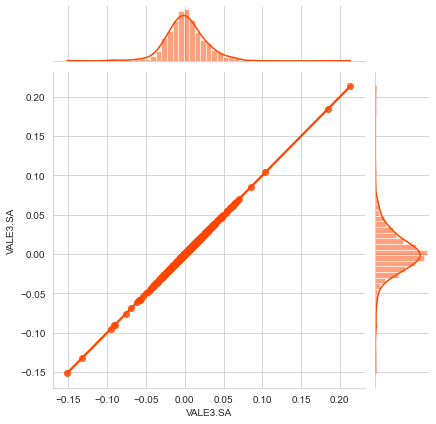

In [105]:
sns.jointplot('VALE3.SA', 'VALE3.SA', returns_df, kind = 'reg', color = 'orangered')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between VALE3.SA and PETR4.SA daily returns.

### How jointplot works
- A joint plot provides a concise way to understand both the relationship between two variables aswell as individual distrubution o each variable.
- The middle figure stands for the relationship plot. It shows how y and x are related.
- The histogram above shows how the **X** distrubution looks like.
- The histogram on the right shows how the **Y** distrubution looks like.
- The upper and right plots together gives us a sense of what the marginal distribution look like from both x and y. 
---

C:\Users\PICHAU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


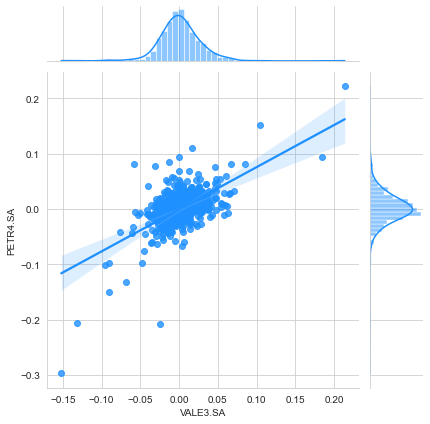

In [106]:
sns.jointplot('VALE3.SA', 'PETR4.SA', returns_df, kind = 'reg', color = 'dodgerblue')

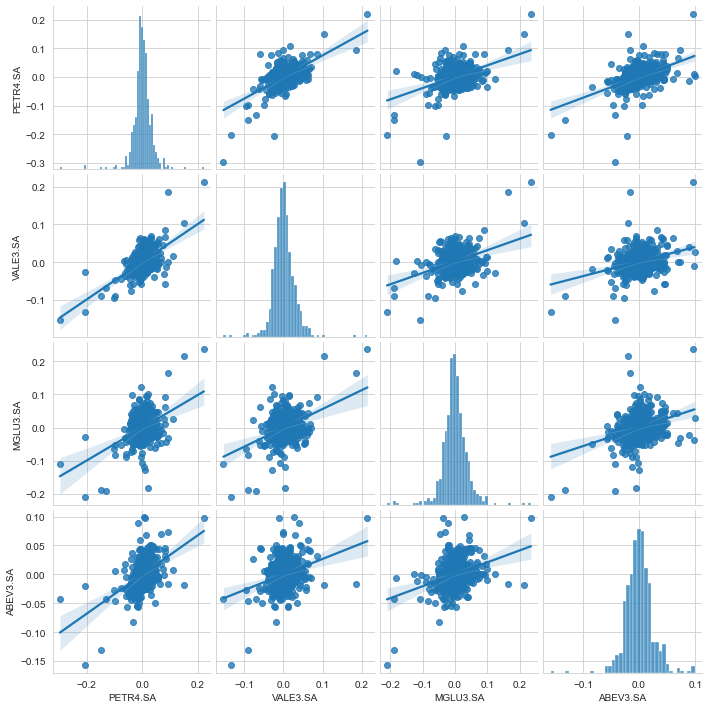

In [107]:
sns.pairplot(returns_df.dropna(), kind = 'reg')

### How pairplot works
- Pairplot helps to detect correlations between all the columns of the dataset.
- It works like a grid, plotting the X-axis against Y-axis creating multiple plots.
- Since the dataset we're plotting has 4 measurements, it creates a 4 x 4 grid plot.